In [62]:
import pandas as pd
import seaborn as sns

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [8]:
user_data = pd.read_csv("3_user_data.csv")
logs = pd.read_csv("3_logs.csv")
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [12]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [13]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [11]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [14]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:
"12, 123, 456"


In [51]:
logs.query("success ==True") \
    .groupby("client") \
    .agg({'success': 'count'}) \
    .query('success==success.max()')

,success
client,
12179,41
28719,41
36165,41
52870,41
61468,41
61473,41
78349,41
82563,41
92584,41


С какой платформы осуществляется наибольшее количество успешных операций?

In [57]:
logs.query("success== True").platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

Какая платформа наиболее популярна среди премиумных клиентов?

In [59]:
users = user_data.merge(logs, on="client")
users

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [60]:
users.query("premium == True").platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

/var/folders/m2/mz1wfh057l302_qhtpqyx0r00000gn/T/ipykernel_4435/263937181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.query("premium== True").age)
/var/folders/m2/mz1wfh057l302_qhtpqyx0r00000gn/T/ipykernel_4435/263937181.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.que

<AxesSubplot: xlabel='age', ylabel='Density'>

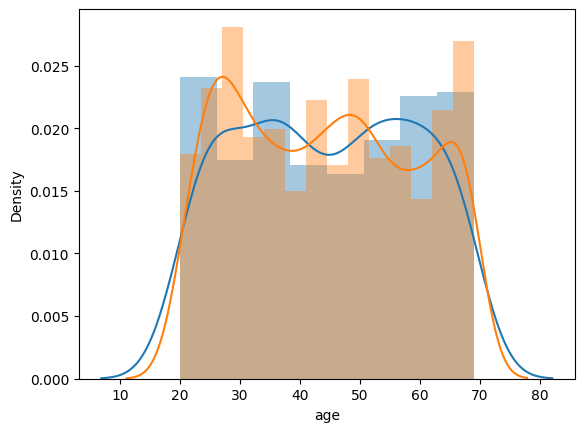

In [70]:
sns.distplot(users.query("premium== True").age)
sns.distplot(users.query("premium== False").age)

Постройте график распределения числа успешных операций: 

* x – число успешных операций
* y – число клиентов, совершивших столько успешных операций

/var/folders/m2/mz1wfh057l302_qhtpqyx0r00000gn/T/ipykernel_4435/3995692161.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(client_suc)


<AxesSubplot: ylabel='Density'>

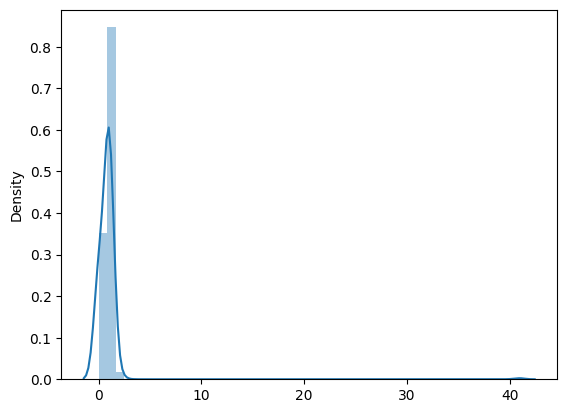

In [71]:
client_suc= users.groupby("client") \
    .agg({"success":"sum"})

sns.distplot(client_suc)

⭐️Задание со звёздочкой!⭐️

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Полезные ссылки:

* sns.countplot – документация к типу графика
* figsize – про размер графиков

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [73]:
computer_suc =users.query("platform == 'computer'") \
    .groupby("age", as_index=False) \
    .agg({"success":"sum"})
computer_suc.head()

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26


<AxesSubplot: xlabel='age', ylabel='success'>

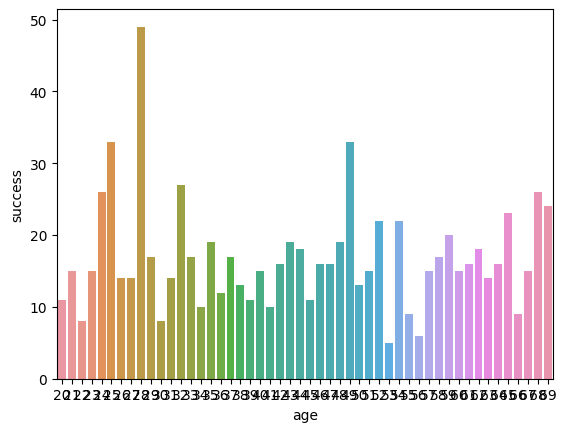

In [75]:

sns.barplot(x=computer_suc.age, y=computer_suc.success)